In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import datetime as dt
from sklearn.cluster import KMeans ,k_means
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [3]:
# loading the dataset

In [4]:
df=pd.read_excel('Raw Data Upload.xlsx')

In [5]:
df.head()

,InvoiceNo,Customer Name,CustomerID,Customer Segment,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,Order ID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,Jessica Myrick,17850.0,Small Business,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",28774.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,Matt Collister,17850.0,Home Office,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",13729.0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,Alan Schoenberger,17850.0,Corporate,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",37537.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,Elizabeth Moffitt,17850.0,Consumer,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",44069.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,Alan Schoenberger,17850.0,Corporate,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",37537.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [6]:
# checking the number of rows and columns
df.shape

(206962, 19)

In [7]:
# checking the number of missing values in each column
df.isnull().sum()

InvoiceNo                      0
Customer Name             198563
CustomerID                 59579
Customer Segment               0
District                       0
latitude                       0
longitude                      0
Age                            0
Gender                         0
Current_Status                 0
Social_Media                  70
Total_Household_Income        70
Order ID                  198563
StockCode                      0
Description                  832
Quantity                       0
InvoiceDate                    0
UnitPrice                      0
Country                        0
dtype: int64

In [8]:
# checking the number of missing values % in each column
df.isnull().sum()/len(df)*100

InvoiceNo                  0.000000
Customer Name             95.941767
CustomerID                28.787410
Customer Segment           0.000000
District                   0.000000
latitude                   0.000000
longitude                  0.000000
Age                        0.000000
Gender                     0.000000
Current_Status             0.000000
Social_Media               0.033823
Total_Household_Income     0.033823
Order ID                  95.941767
StockCode                  0.000000
Description                0.402006
Quantity                   0.000000
InvoiceDate                0.000000
UnitPrice                  0.000000
Country                    0.000000
dtype: float64

# Cleaning the dataset

In [9]:
#dropping the non important columns to process ML
df.drop(['Customer Name','Order ID','Customer Segment'],axis =1,inplace = True )
#df.drop(['InvoiceNo','StockCode','Description','Order ID','Customer Name','District','latitude','longitude','UnitPrice'],axis =1,inplace = True )
#df.drop(['InvoiceNo'],axis=1,inplace=True)

In [10]:
#df.drop(df.tail(60000).index,inplace = True)

In [11]:
df.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [12]:
# checking the number of rows and columns
df.shape

(206962, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206962 entries, 0 to 206961
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               206962 non-null  object        
 1   CustomerID              147383 non-null  float64       
 2   District                206962 non-null  object        
 3   latitude                206962 non-null  float64       
 4   longitude               206962 non-null  float64       
 5   Age                     206962 non-null  object        
 6   Gender                  206962 non-null  object        
 7   Current_Status          206962 non-null  object        
 8   Social_Media            206892 non-null  object        
 9   Total_Household_Income  206892 non-null  object        
 10  StockCode               206962 non-null  object        
 11  Description             206130 non-null  object        
 12  Quantity                206962

In [14]:
df.isnull().sum()

InvoiceNo                     0
CustomerID                59579
District                      0
latitude                      0
longitude                     0
Age                           0
Gender                        0
Current_Status                0
Social_Media                 70
Total_Household_Income       70
StockCode                     0
Description                 832
Quantity                      0
InvoiceDate                   0
UnitPrice                     0
Country                       0
dtype: int64

In [15]:
df.isnull().sum()/len(df)*100

InvoiceNo                  0.000000
CustomerID                28.787410
District                   0.000000
latitude                   0.000000
longitude                  0.000000
Age                        0.000000
Gender                     0.000000
Current_Status             0.000000
Social_Media               0.033823
Total_Household_Income     0.033823
StockCode                  0.000000
Description                0.402006
Quantity                   0.000000
InvoiceDate                0.000000
UnitPrice                  0.000000
Country                    0.000000
dtype: float64

In [16]:
# count of duplicated rows in the data
df.duplicated().sum()

0

## InvoiceNo 

In [17]:
# these are the transactions that have negative quantity which indicates returned or cancelled orders
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,14527.0,Falkirk,56.006080,-3.719303,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 50,000",D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,15311.0,Bath and North East Somerset,51.321229,-2.539372,OldAdult,Female,Married with children,Up to 3 hours,"Less Than 50,000",35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,17548.0,Birmingham,52.551509,-1.882400,MiddleAgeAdult,Female,Single,Up to 3 hours,"Less Than 200,000",22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,17548.0,"Kingston upon Hull, City of",53.754981,-0.347014,OldAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,17548.0,City of Edinburgh,55.928910,-3.208812,SenierCitizen,Male,Couple,Up to 3 hours,"Less Than 100,000",21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206300,C554926,16422.0,Harrow,51.503865,-2.118110,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"More Than 200,000",20975,12 PENCILS SMALL TUBE RED RETROSPOT,-24,2011-05-27 12:59:00,0.65,United Kingdom
206340,C554931,17841.0,Islington,55.943994,-0.488301,YoungeAdult,Male,Single,Half a day,"Less Than 100,000",21648,ASSORTED TUTTI FRUTTI SMALL PURSE,-1,2011-05-27 13:21:00,1.25,United Kingdom
206341,C554931,17841.0,Newham,52.576746,-0.406095,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 200,000",21670,BLUE SPOT CERAMIC DRAWER KNOB,-1,2011-05-27 13:21:00,1.25,United Kingdom
206342,C554931,17841.0,North Somerset,52.433865,0.299647,YoungeAdult,Female,Single,More than half a day,"Less Than 50,000",21671,RED SPOT CERAMIC DRAWER KNOB,-1,2011-05-27 13:21:00,1.25,United Kingdom


In [18]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape

(203196, 16)

###  Exploring Country Column 

In [19]:
#  90% + have country as UK 
df.Country.value_counts(normalize=True)
#df.Country.value_counts(ascending=False)....giving counts

United Kingdom          0.922361
Germany                 0.016408
France                  0.014710
EIRE                    0.012067
Spain                   0.004469
Netherlands             0.004375
Belgium                 0.003415
Portugal                0.002766
Switzerland             0.002741
Australia               0.002416
Cyprus                  0.001491
Finland                 0.001447
Channel Islands         0.001388
Italy                   0.001309
Japan                   0.001102
Norway                  0.000994
Hong Kong               0.000901
Poland                  0.000807
Sweden                  0.000787
Austria                 0.000610
Singapore               0.000556
Greece                  0.000418
Iceland                 0.000413
Denmark                 0.000384
Unspecified             0.000364
Lebanon                 0.000221
Israel                  0.000177
Lithuania               0.000172
Brazil                  0.000157
United Arab Emirates    0.000148
USA       

In [20]:
# combining rest countries into one category
#df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
#df.Country.value_counts(normalize=True)

###  Exploring Quantity Column 

In [21]:
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders
df.Quantity.describe()

count    203196.000000
mean         10.125746
std         171.624431
min       -5368.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       74215.000000
Name: Quantity, dtype: float64

In [22]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
df[df['Quantity']<0]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
2406,536589,NaN,Cheltenham,51.903514,-2.114110,MiddleAgeAdult,Male,Single,Half a day,"Less Than 50,000",21777,NaN,-10,2010-12-01 16:50:00,0.0,United Kingdom
4347,536764,NaN,Barnet,51.643239,-0.171145,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",84952C,NaN,-38,2010-12-02 14:42:00,0.0,United Kingdom
7188,536996,NaN,South Gloucestershire,51.441223,-2.468242,SenierCitizen,Male,Couple,Half a day,"Less Than 50,000",22712,NaN,-20,2010-12-03 15:30:00,0.0,United Kingdom
7189,536997,NaN,"Bournemouth, Christchurch and Poole",50.735606,-1.935912,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 100,000",22028,NaN,-20,2010-12-03 15:30:00,0.0,United Kingdom
7190,536998,NaN,Eden,54.748657,-2.998840,SenierCitizen,Male,Couple,Up to 3 hours,"Less Than 200,000",85067,NaN,-6,2010-12-03 15:30:00,0.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204603,554680,NaN,Barnet,53.769306,-0.782328,SenierCitizen,Male,Couple,Up to 3 hours,"Less Than 200,000",35916B,NaN,-21,2011-05-25 16:04:00,0.0,United Kingdom
204604,554681,NaN,Cotswold,51.799790,-1.954909,OldAdult,Male,Couple,More than half a day,"Less Than 50,000",35916C,NaN,-32,2011-05-25 16:04:00,0.0,United Kingdom
205953,554852,NaN,Kirklees,51.539049,-2.324415,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",21272,?,-212,2011-05-27 09:24:00,0.0,United Kingdom
206179,554907,NaN,Bradford,53.790400,-0.828048,OldAdult,Male,Married with children,Up to 3 hours,"More Than 200,000",40003,NaN,-11,2011-05-27 11:45:00,0.0,United Kingdom


In [23]:
# keeping only those transactions that have successfully ordered
df = df[df['Quantity']>=0]
df.shape

(202545, 16)

In [24]:
df.Quantity.describe()

count    202545.000000
mean         10.499292
std         170.614732
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       74215.000000
Name: Quantity, dtype: float64

In [25]:
# removing the expectional case where quantity > 500
df = df[df['Quantity']<500]
df.shape

(202357, 16)

In [26]:
df.Quantity.describe()

count    202357.000000
mean          9.193000
std          22.123708
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         492.000000
Name: Quantity, dtype: float64

<AxesSubplot:>

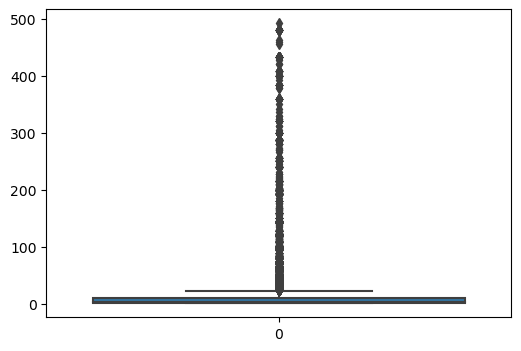

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Quantity'])

In [28]:
# Binning Quantity Column 
bins = [0,2,5,12,50,500]
labels=['One or Two','Three to Five','Six to Twelve','Thirteen to Fifty','Bulk Order']

df['Quantity_brackets'] = pd.cut(df['Quantity'],bins,labels=labels)

In [29]:
df.head(2)

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Six to Twelve
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve


## Exploring UnitPrice Column 

In [30]:
df.UnitPrice.describe()

count    202357.000000
mean          4.159303
std          39.671765
min           0.000000
25%           1.250000
50%           2.100000
75%           4.210000
max       13541.330000
Name: UnitPrice, dtype: float64

<AxesSubplot:>

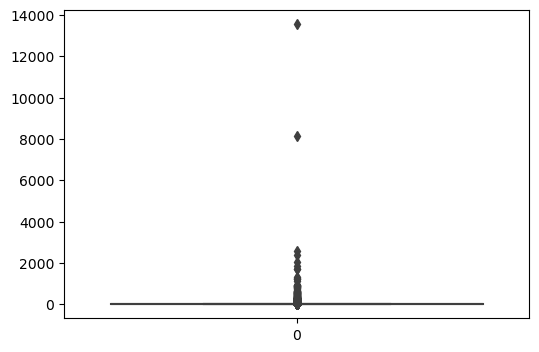

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['UnitPrice'])

In [32]:
# Removing outliers for Monetary
Q1 = df.UnitPrice.quantile(0.05)
Q3 = df.UnitPrice.quantile(0.95)
IQR = Q3 - Q1
df['UnitPrice'] = df.UnitPrice[(df.UnitPrice >= Q1 - 1.5*IQR) & (df.UnitPrice <= Q3 + 1.5*IQR)]


<AxesSubplot:>

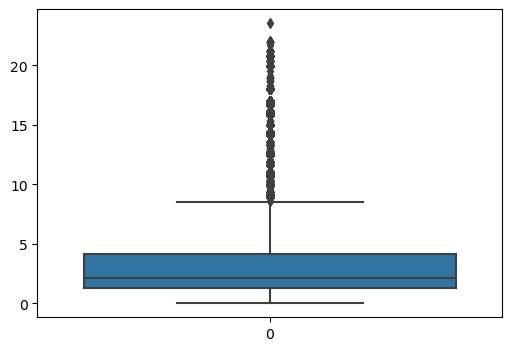

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['UnitPrice'])

In [34]:
df.UnitPrice.describe()

count    200900.000000
mean          3.334111
std           3.217386
min           0.000000
25%           1.250000
50%           2.100000
75%           4.150000
max          23.530000
Name: UnitPrice, dtype: float64

In [35]:
# looking at the data where UnitPrice is negative or 0
df[df['UnitPrice']<=0]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets
622,536414,NaN,Tendring,51.795085,1.171284,OldAdult,Female,Single,Half a day,"Less Than 100,000",22139,NaN,56,2010-12-01 11:52:00,0.0,United Kingdom,Bulk Order
1970,536545,NaN,Coventry,52.399779,-1.479946,OldAdult,Female,Single,Half a day,"Less Than 100,000",21134,NaN,1,2010-12-01 14:32:00,0.0,United Kingdom,One or Two
1971,536546,NaN,Fermanagh and Omagh,54.468975,-8.095628,OldAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",22145,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom,One or Two
1972,536547,NaN,Sandwell,52.509782,-2.045588,OldAdult,Female,Single,Half a day,"Less Than 100,000",37509,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom,One or Two
1987,536549,NaN,Croydon,51.317941,-0.134501,OldAdult,Male,Couple,Half a day,"Less Than 50,000",85226A,NaN,1,2010-12-01 14:34:00,0.0,United Kingdom,One or Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204945,554696,NaN,Antrim and Newtownabbey,52.279629,0.019201,MiddleAgeAdult,Female,Couple,Up to 3 hours,"Less Than 100,000",85016,NaN,5,2011-05-25 17:14:00,0.0,United Kingdom,Three to Five
205712,554828,NaN,Islington,51.406181,-0.075556,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",16049,NaN,74,2011-05-26 15:21:00,0.0,United Kingdom,Bulk Order
205713,554829,NaN,"Armagh City, Banbridge and Craigavon",51.396362,-2.284442,MiddleAgeAdult,Male,Couple,Up to 3 hours,"More Than 200,000",20801,NaN,6,2011-05-26 15:22:00,0.0,United Kingdom,Six to Twelve
205714,554830,NaN,City of Edinburgh,52.434689,-1.480920,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 50,000",21904,NaN,3,2011-05-26 15:22:00,0.0,United Kingdom,Three to Five


In [36]:
# keeping only those UnitPrice that have successfully delivered (Non Return / Exchanged)
df = df[df['UnitPrice']>=1]
df.shape

(162314, 17)

In [37]:
df.UnitPrice.describe()

count    162314.000000
mean          3.974921
std           3.265290
min           1.000000
25%           1.650000
50%           2.950000
75%           4.950000
max          23.530000
Name: UnitPrice, dtype: float64

<AxesSubplot:>

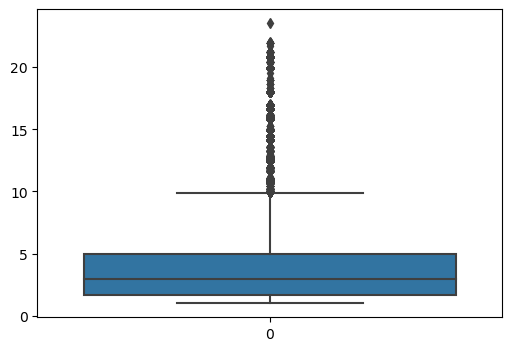

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['UnitPrice'])

In [39]:
# Binning UnitPrice Column 
bins = [0,2,5,12,25]
labels=['upto Two Thousand','upto Five Thousand','upto Twelve Thousand','Thirteen Thousand plus']

df['UnitPrice_brackets'] = pd.cut(df['UnitPrice'],bins,labels=labels)

In [40]:
df.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Six to Twelve,upto Five Thousand
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,Six to Twelve,upto Five Thousand
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand


In [41]:
# creating some columns for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']

In [42]:
df.head(2)

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets,Amount
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Six to Twelve,upto Five Thousand,15.30
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand,20.34


In [43]:
df.Amount.describe()

count    162314.000000
mean         19.730907
std          47.278662
min           1.000000
25%           4.250000
50%          11.630000
75%          17.850000
max        2978.400000
Name: Amount, dtype: float64

<AxesSubplot:>

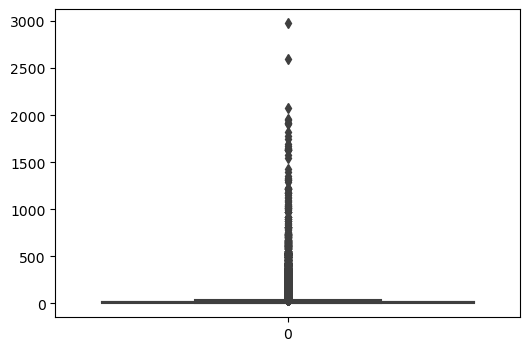

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Amount'])

In [45]:
# Binning Amount Column 
bins = [0,5,10,20,30,50,1000,3000]
labels=['upto Five Thousand','Five to Ten Thousand','Ten to Twenty Thousand','Twenty to Thirty Thousand','Thirty to Fifty Thousand','Fifty to One Lakh','One Lakh Plus']

df['Amount_brackets'] = pd.cut(df['Amount'],bins,labels=labels)

In [46]:
df.head(10)

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Six to Twelve,upto Five Thousand,15.30,Ten to Twenty Thousand
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,Six to Twelve,upto Five Thousand,22.00,Twenty to Thirty Thousand
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand
5,536365,17850.0,Welwyn Hatfield,51.804196,-0.205381,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,One or Two,upto Twelve Thousand,15.30,Ten to Twenty Thousand
6,536365,17850.0,Bolton,53.581008,-2.455316,OldAdult,Female,Couple,Up to 3 hours,"Less Than 100,000",21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,Six to Twelve,upto Five Thousand,25.50,Twenty to Thirty Thousand
7,536366,17850.0,Dartford,51.444500,0.209755,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 200,000",22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,United Kingdom,Six to Twelve,upto Two Thousand,11.10,Ten to Twenty Thousand
8,536366,17850.0,Bury,53.580693,-2.283884,MiddleAgeAdult,Female,Single,Half a day,"Less Than 50,000",22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,United Kingdom,Six to Twelve,upto Two Thousand,11.10,Ten to Twenty Thousand
9,536367,13047.0,Aylesbury Vale,51.803390,-0.724381,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom,Thirteen to Fifty,upto Two Thousand,54.08,Fifty to One Lakh


In [47]:
df.shape

(162314, 20)

In [48]:
df.isnull().sum()

InvoiceNo                     0
CustomerID                49602
District                      0
latitude                      0
longitude                     0
Age                           0
Gender                        0
Current_Status                0
Social_Media                 55
Total_Household_Income       55
StockCode                     0
Description                   0
Quantity                      0
InvoiceDate                   0
UnitPrice                     0
Country                       0
Quantity_brackets             0
UnitPrice_brackets            0
Amount                        0
Amount_brackets               0
dtype: int64

## Description 

In [49]:
# checking the number of unique item list
df.Description.nunique()

2997

In [50]:
# top 10 item sold
df.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    1146
REGENCY CAKESTAND 3 TIER               888
JUMBO BAG RED RETROSPOT                839
PARTY BUNTING                          778
LUNCH BAG RED RETROSPOT                660
ASSORTED COLOUR BIRD ORNAMENT          624
NATURAL SLATE HEART CHALKBOARD         598
SET OF 3 CAKE TINS PANTRY DESIGN       592
SET OF 6 SPICE TINS PANTRY DESIGN      579
JAM MAKING SET WITH JARS               579
Name: Description, dtype: int64

In [51]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
df[df['Description'].str.startswith('?')==True]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets


In [52]:
# removing all the above entries
df = df[df['Description'].str.startswith('?')!=True]
df.shape

(162314, 20)

In [53]:
# checking the data where description = * and it is noted that customerid is NaN
df[df['Description'].str.startswith('*')==True]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets
20749,538071,NaN,Birmingham,52.478207,-1.931050,MiddleAgeAdult,Male,Single,Half a day,"Less Than 100,000",21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,United Kingdom,One or Two,Thirteen Thousand plus,16.98,Ten to Twenty Thousand
35675,539437,NaN,North Somerset,50.756075,-2.875807,MiddleAgeAdult,Male,Single,Half a day,"Less Than 100,000",20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,United Kingdom,One or Two,upto Twelve Thousand,8.47,Five to Ten Thousand
37095,539453,NaN,Tower Hamlets,53.361839,-0.058075,OldAdult,Female,Married with children,Up to 3 hours,"Less Than 200,000",20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,United Kingdom,One or Two,upto Twelve Thousand,8.47,Five to Ten Thousand


In [54]:
# replacing with appropriate name
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [55]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.islower()==True]['Description'].value_counts()

Series([], Name: Description, dtype: int64)

In [56]:
# removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(162314, 20)

In [57]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                63
Dotcomgiftshop Gift Voucher £20.00     5
Bank Charges                           4
Dotcomgiftshop Gift Voucher £10.00     4
Next Day Carriage                      1
Name: Description, dtype: int64

In [58]:
# removing all the above listed noises
df = df[df['Description'].str.istitle()!=True]
df.shape

(162237, 20)

In [59]:
df['Description'] = df['Description'].str.strip()

## Customer ID

In [60]:
# count of unique customer
df.CustomerID.nunique()

2663

In [61]:
# checking where customer id is null
df[df.CustomerID.isnull()]

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets
1443,536544,NaN,South Gloucestershire,51.598619,-2.535579,YoungeAdult,Female,Couple,Half a day,"Less Than 50,000",21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,United Kingdom,One or Two,upto Five Thousand,2.51,upto Five Thousand
1444,536544,NaN,Bridgend,51.499160,-3.574459,SenierCitizen,Female,Single,Half a day,"Less Than 100,000",21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,United Kingdom,One or Two,upto Five Thousand,5.02,Five to Ten Thousand
1446,536544,NaN,Wyre Forest,52.386268,-2.248266,MiddleAgeAdult,Male,Couple,Up to 3 hours,"Less Than 100,000",21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,United Kingdom,One or Two,upto Two Thousand,3.32,upto Five Thousand
1447,536544,NaN,Nuneaton and Bedworth,52.459450,-1.474460,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,United Kingdom,Six to Twelve,upto Two Thousand,14.94,Ten to Twenty Thousand
1448,536544,NaN,"Armagh City, Banbridge and Craigavon",54.475059,-6.369358,OldAdult,Male,Couple,Half a day,"Less Than 50,000",21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,United Kingdom,One or Two,upto Five Thousand,5.02,Five to Ten Thousand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206956,554961,NaN,North Somerset,51.593979,-2.096799,MiddleAgeAdult,Male,Couple,Up to 3 hours,"Less Than 200,000",21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",1,2011-05-27 15:19:00,10.79,United Kingdom,One or Two,upto Twelve Thousand,10.79,Ten to Twenty Thousand
206957,554961,NaN,Derby,51.804196,-2.096799,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 200,000",21218,RED SPOTTY BISCUIT TIN,1,2011-05-27 15:19:00,8.29,United Kingdom,One or Two,upto Twelve Thousand,8.29,Five to Ten Thousand
206958,554961,NaN,Aberdeenshire,53.581008,-1.588626,YoungeAdult,Male,Single,Up to 3 hours,"Less than 20,000",21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,1,2011-05-27 15:19:00,8.29,United Kingdom,One or Two,upto Twelve Thousand,8.29,Five to Ten Thousand
206959,554961,NaN,Glasgow City,51.444500,0.624822,MiddleAgeAdult,Male,Couple,Up to 3 hours,"Less Than 200,000",21430,SET/3 RED GINGHAM ROSE STORAGE BOX,2,2011-05-27 15:19:00,7.46,United Kingdom,One or Two,upto Twelve Thousand,14.92,Ten to Twenty Thousand


In [62]:
# removing entries where customer id is null
df = df[~df.CustomerID.isnull()]
df.shape

(112649, 20)

In [63]:
df.isnull().sum()

InvoiceNo                  0
CustomerID                 0
District                   0
latitude                   0
longitude                  0
Age                        0
Gender                     0
Current_Status             0
Social_Media              48
Total_Household_Income    48
StockCode                  0
Description                0
Quantity                   0
InvoiceDate                0
UnitPrice                  0
Country                    0
Quantity_brackets          0
UnitPrice_brackets         0
Amount                     0
Amount_brackets            0
dtype: int64

### Handeling values in DATE Column 

In [64]:
df.InvoiceDate.info()

<class 'pandas.core.series.Series'>
Int64Index: 112649 entries, 0 to 206710
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
112649 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [65]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
206706   2011-05-27 14:55:00
206707   2011-05-27 14:55:00
206708   2011-05-27 14:55:00
206709   2011-05-27 14:55:00
206710   2011-05-27 14:55:00
Name: InvoiceDate, Length: 112649, dtype: datetime64[ns]

In [66]:
df['Invoice_weekname'] = pd.DatetimeIndex(df['InvoiceDate']).day_name()
df['Invoice_weekname']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
206706       Friday
206707       Friday
206708       Friday
206709       Friday
206710       Friday
Name: Invoice_weekname, Length: 112649, dtype: object

In [67]:
df['Invoice_Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Invoice_Year']

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
206706    2011
206707    2011
206708    2011
206709    2011
206710    2011
Name: Invoice_Year, Length: 112649, dtype: int64

In [68]:
df['Invoice_Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Invoice_Month']

0         12
1         12
2         12
3         12
4         12
          ..
206706     5
206707     5
206708     5
206709     5
206710     5
Name: Invoice_Month, Length: 112649, dtype: int64

In [69]:
df['Invoice_QTR'] = pd.DatetimeIndex(df['InvoiceDate']).quarter
df['Invoice_QTR']

0         4
1         4
2         4
3         4
4         4
         ..
206706    2
206707    2
206708    2
206709    2
206710    2
Name: Invoice_QTR, Length: 112649, dtype: int64

In [70]:
# Replacing catergorical verablr by Ordinal Numbers
weekday_map = {'Sunday':6,
               'Monday':5,
               'Tuesday':4,
               'Wednesday':3,
               'Thursday':2,
               'Friday':1
               }
df['Invoice_Day'] = df.Invoice_weekname.map(weekday_map)

In [71]:
df['Invoice_Date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [72]:
#dropping the InvoiceDate column
df.drop(['InvoiceDate'],axis =1,inplace = True )

In [73]:
df.head(50)

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets,Invoice_weekname,Invoice_Year,Invoice_Month,Invoice_QTR,Invoice_Day,Invoice_Date
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",...,Six to Twelve,upto Five Thousand,15.30,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,Six to Twelve,upto Five Thousand,22.00,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
5,536365,17850.0,Welwyn Hatfield,51.804196,-0.205381,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,One or Two,upto Twelve Thousand,15.30,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01
6,536365,17850.0,Bolton,53.581008,-2.455316,OldAdult,Female,Couple,Up to 3 hours,"Less Than 100,000",...,Six to Twelve,upto Five Thousand,25.50,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
7,536366,17850.0,Dartford,51.444500,0.209755,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,Six to Twelve,upto Two Thousand,11.10,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01
8,536366,17850.0,Bury,53.580693,-2.283884,MiddleAgeAdult,Female,Single,Half a day,"Less Than 50,000",...,Six to Twelve,upto Two Thousand,11.10,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01
9,536367,13047.0,Aylesbury Vale,51.803390,-0.724381,MiddleAgeAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,Thirteen to Fifty,upto Two Thousand,54.08,Fifty to One Lakh,Wednesday,2010,12,4,3,2010-12-01


In [74]:
df.shape

(112649, 25)

In [75]:
df.Total_Household_Income.value_counts()

Less Than 100,000    45300
Less Than 50,000     36157
Less Than 200,000    19873
Less than 20,000      5794
More Than 200,000     5477
Name: Total_Household_Income, dtype: int64

In [76]:
#Total_Household_Income
most_frequent_Income=df['Total_Household_Income'].value_counts().index[0]
df['Total_Household_Income'].fillna(most_frequent_Income,inplace=True)
most_frequent_Income

'Less Than 100,000'

In [77]:
#Social_Media
most_frequent_SM_Hours=df['Social_Media'].value_counts().index[0]
df['Social_Media'].fillna(most_frequent_SM_Hours,inplace=True)
most_frequent_SM_Hours

'Up to 3 hours'

In [78]:
df.isnull().sum()

InvoiceNo                 0
CustomerID                0
District                  0
latitude                  0
longitude                 0
Age                       0
Gender                    0
Current_Status            0
Social_Media              0
Total_Household_Income    0
StockCode                 0
Description               0
Quantity                  0
UnitPrice                 0
Country                   0
Quantity_brackets         0
UnitPrice_brackets        0
Amount                    0
Amount_brackets           0
Invoice_weekname          0
Invoice_Year              0
Invoice_Month             0
Invoice_QTR               0
Invoice_Day               0
Invoice_Date              0
dtype: int64

In [79]:
df.shape

(112649, 25)

In [80]:
# investigaing all the unique elements in each features 

for column in df:
    unique = df[column].unique()
    value = len (unique)
    if value < 10:
        print('{} :{} -- {}'.format (column,value,unique))
    else:
        print('{} :{} '.format (column,value))

InvoiceNo :7104 
CustomerID :2663 
District :225 
latitude :13242 
longitude :13260 
Age :5 -- ['MiddleAgeAdult' 'SenierCitizen' 'OldAdult' 'YoungeAdult' 'Child']
Gender :2 -- ['Female' 'Male']
Current_Status :4 -- ['Married with children' 'Couple' 'Single' 'Living With Parent']
Social_Media :3 -- ['Up to 3 hours' 'Half a day' 'More than half a day']
Total_Household_Income :5 -- ['Less Than 100,000' 'Less Than 50,000' 'Less Than 200,000'
 'More Than 200,000' 'Less than 20,000']
StockCode :2423 
Description :2480 
Quantity :129 
UnitPrice :156 
Country :35 
Quantity_brackets :5 -- ['Six to Twelve', 'One or Two', 'Thirteen to Fifty', 'Three to Five', 'Bulk Order']
Categories (5, object): ['One or Two' < 'Three to Five' < 'Six to Twelve' < 'Thirteen to Fifty' < 'Bulk Order']
UnitPrice_brackets :4 -- ['upto Five Thousand', 'upto Twelve Thousand', 'upto Two Thousand', 'Thirteen Thousand plus']
Categories (4, object): ['upto Two Thousand' < 'upto Five Thousand' < 'upto Twelve Thousand' < 'Th

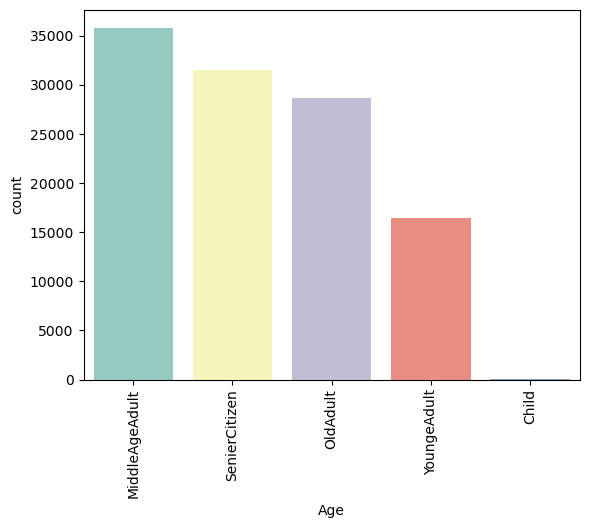

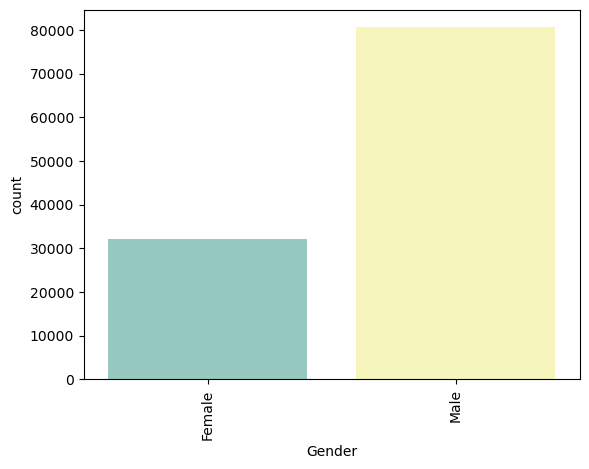

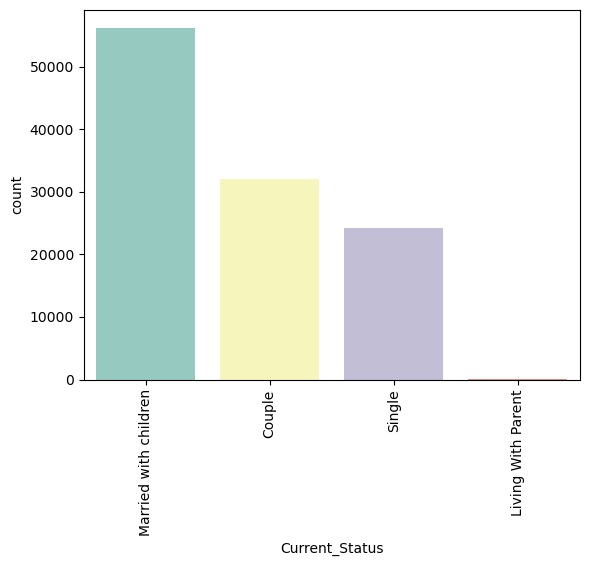

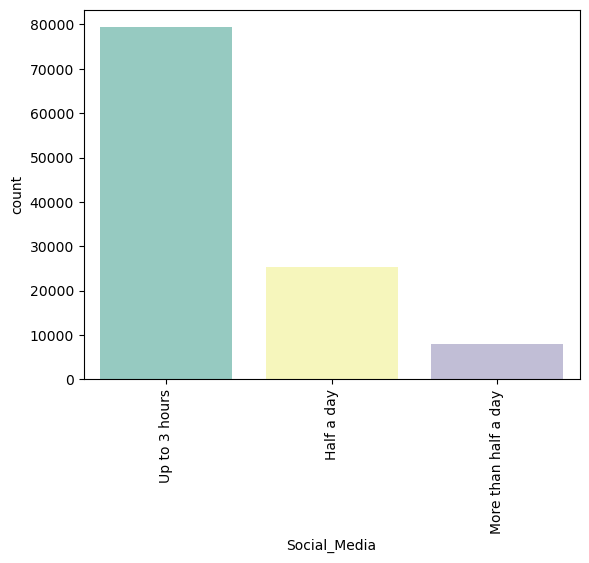

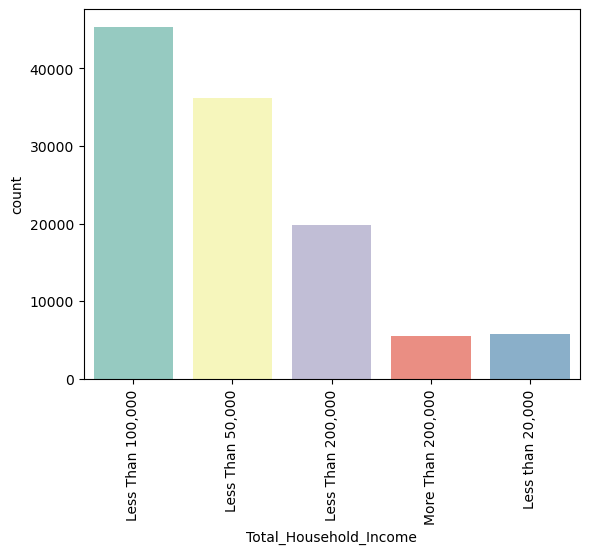

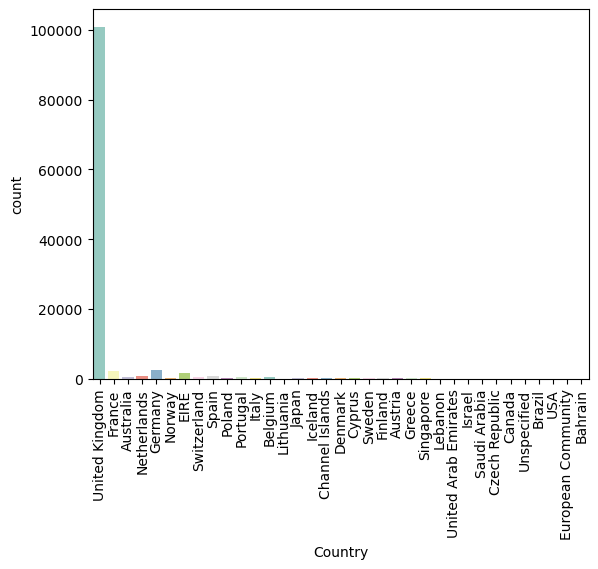

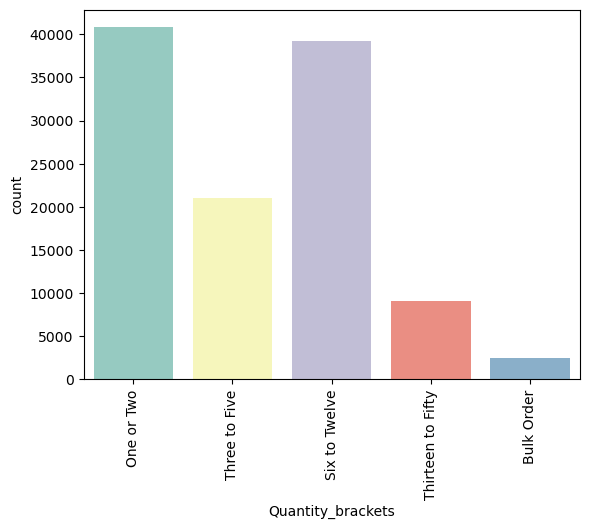

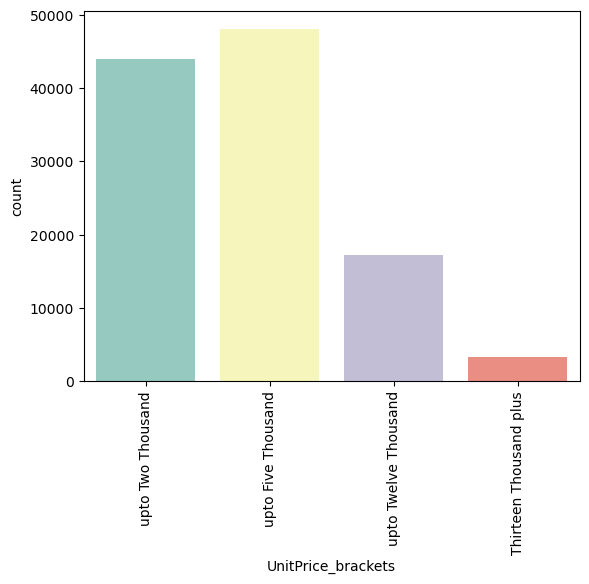

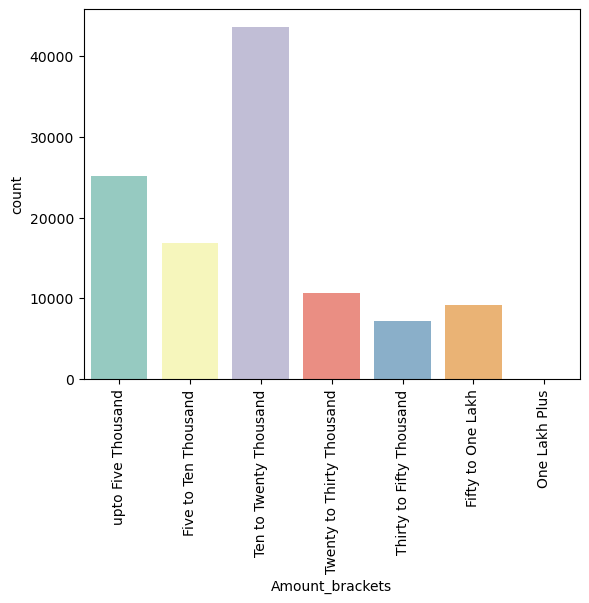

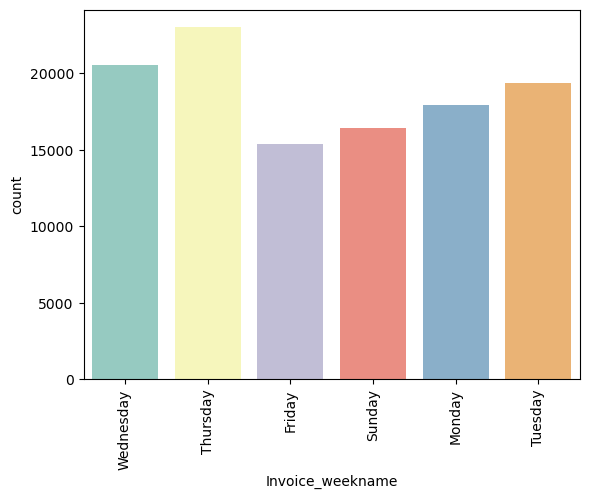

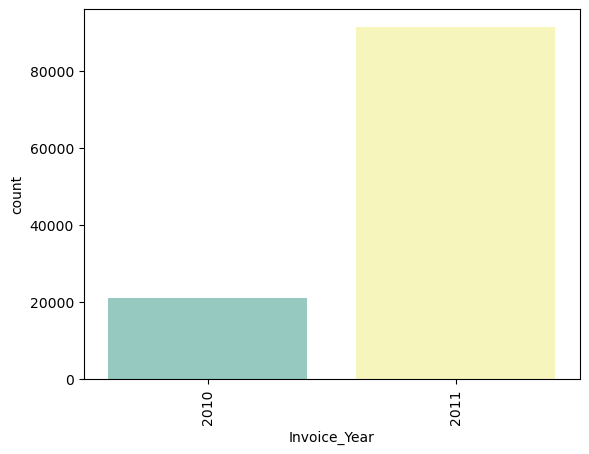

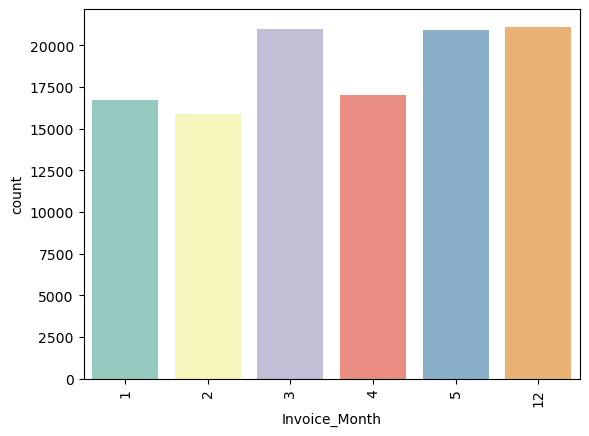

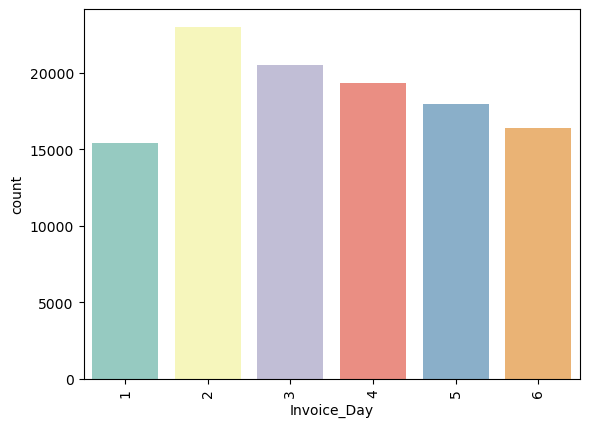

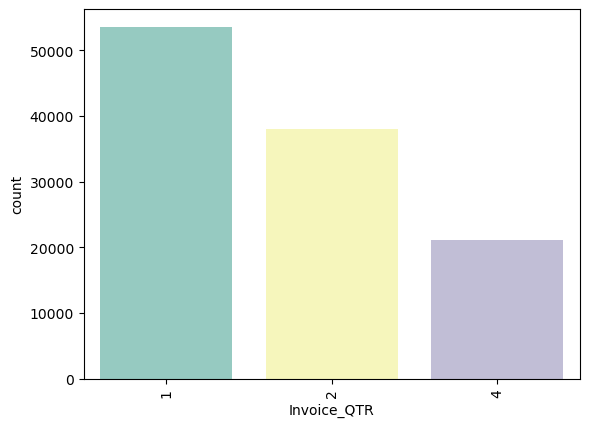

In [81]:
features_view = ['Age', 'Gender', 'Current_Status',
       'Social_Media', 'Total_Household_Income','Country','Quantity_brackets','UnitPrice_brackets','Amount_brackets',
                 'Invoice_weekname','Invoice_Year','Invoice_Month','Invoice_Day','Invoice_QTR']


for f in features_view:
    sns.countplot(x =f,data = df ,palette = 'Set3')
    plt.xticks(rotation= 90)
    plt.show()

# Extracting Recency, Frequency & Monitory Values 

In [82]:

print('The minimum date is:',df.Invoice_Date.min())
print('The maximum date is:',df.Invoice_Date.max())

The minimum date is: 2010-12-01
The maximum date is: 2011-05-27


In [83]:
# count of unique customer
df.CustomerID.nunique()


2663

In [84]:
# extracting the RECENCY

Recency = pd.DataFrame(df.groupby('CustomerID')['Invoice_Date'].max().reset_index())
Recency['Invoice_Date'] = pd.to_datetime(Recency['Invoice_Date']).dt.date
Recency['MaxDate'] = Recency['Invoice_Date'].max()
Recency['Recency'] = (Recency['MaxDate'] - Recency['Invoice_Date']).dt.days + 1
Recency = Recency[['CustomerID','Recency']]
Recency.head()

,CustomerID,Recency
0,12347.0,51
1,12348.0,53
2,12350.0,115
3,12352.0,67
4,12353.0,9


In [85]:
# extracting the FREQUENCY

Frequency = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
Frequency.columns = ['fCustomerID','Frequency']
Frequency.head()

,fCustomerID,Frequency
0,12347.0,3
1,12348.0,2
2,12350.0,1
3,12352.0,4
4,12353.0,1


In [86]:
# extracting the MONETARY

Monetary = pd.DataFrame(df.groupby('CustomerID')['Amount'].sum().reset_index())
Monetary.columns = ['mCustomerID','Monetary']
Monetary.head()

,mCustomerID,Monetary
0,12347.0,1593.89
1,12348.0,484.00
2,12350.0,255.30
3,12352.0,631.31
4,12353.0,89.00


In [87]:
df.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,Quantity_brackets,UnitPrice_brackets,Amount,Amount_brackets,Invoice_weekname,Invoice_Year,Invoice_Month,Invoice_QTR,Invoice_Day,Invoice_Date
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",...,Six to Twelve,upto Five Thousand,15.30,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,Six to Twelve,upto Five Thousand,22.00,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,Six to Twelve,upto Five Thousand,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01


In [88]:
# CREATING DIIFENT TABLE FOR RFM Values
#df=pd.concat([df_1,df_2])
#new_df=df.groupby(["num","distance"],as_index=false,sort=false).agg({"algo": ",".join,"result":"first"})


In [89]:
# CREATING DIIFENT TABLE FOR RFM Values

RFM = pd.concat([Recency,Frequency,Monetary], axis=1)
RFM.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12347.0,51,3,1593.89
1,12348.0,53,2,484.00
2,12350.0,115,1,255.30
3,12352.0,67,4,631.31
4,12353.0,9,1,89.00
5,12354.0,37,1,918.02
6,12355.0,19,1,459.40
7,12356.0,50,2,2349.81
8,12359.0,110,2,1473.65
9,12360.0,5,1,796.42


In [90]:
RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,2663.000000,2663.000000,2663.000000,2663.000000
mean,15291.119039,61.160345,2.667668,988.337450
std,1713.104932,51.780777,3.870601,2991.262288
min,12347.000000,1.000000,1.000000,2.900000
25%,13820.000000,17.000000,1.000000,204.900000
50%,15237.000000,47.000000,2.000000,403.150000
75%,16765.500000,93.500000,3.000000,909.700000
max,18287.000000,178.000000,78.000000,92221.720000


In [91]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

RFM['Recency_score'] = pd.cut(RFM['Recency'], bins=[0,18,51,100,150,200], labels=[5,4,3,2,1])
RFM['Recency_score'] = RFM['Recency_score'].astype('int')
RFM['Frequency_score'] = pd.cut(RFM['Frequency'], bins=[0,1,10,30,50,100], labels=[1,2,3,4,5])
RFM['Frequency_score'] = RFM['Frequency_score'].astype('int')
RFM['Monetary_score'] = pd.cut(RFM['Monetary'], bins=[1,10000,25000,50000,100000,150000], labels=[1,2,3,4,5])
RFM['Monetary_score'] = RFM['Monetary_score'].astype('int')

In [92]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_RFM(x) : return (x['Recency_score']) + (x['Frequency_score']) + (x['Monetary_score'])
RFM['score'] = RFM.apply(score_RFM,axis=1 )
RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,score
0,12347.0,51,3,1593.89,4,2,1,7.0
1,12348.0,53,2,484.00,3,2,1,6.0
2,12350.0,115,1,255.30,2,1,1,4.0
3,12352.0,67,4,631.31,3,2,1,6.0
4,12353.0,9,1,89.00,5,1,1,7.0


In [93]:
RFM.describe()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,score
count,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000
mean,15291.119039,61.160345,2.667668,988.337450,3.482163,1.533233,1.012017,6.027413
std,1713.104932,51.780777,3.870601,2991.262288,1.279630,0.567995,0.141919,1.652696
min,12347.000000,1.000000,1.000000,2.900000,1.000000,1.000000,1.000000,3.000000
25%,13820.000000,17.000000,1.000000,204.900000,3.000000,1.000000,1.000000,5.000000
50%,15237.000000,47.000000,2.000000,403.150000,4.000000,2.000000,1.000000,6.000000
75%,16765.500000,93.500000,3.000000,909.700000,5.000000,2.000000,1.000000,7.000000
max,18287.000000,178.000000,78.000000,92221.720000,5.000000,5.000000,4.000000,13.000000


In [96]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

RFM['customer_type'] = pd.cut(RFM['score'], bins=[0,3,6,10,15], labels=['Bronze','Silver','Gold','Platinum'])
RFM.tail()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,score,customer_type
2658,18272.0,30,2,796.06,4,2,1,7.0,Gold
2659,18273.0,62,1,51.00,3,1,1,5.0,Silver
2660,18280.0,82,1,180.60,3,1,1,5.0,Silver
2661,18283.0,5,5,455.99,5,2,1,8.0,Gold
2662,18287.0,6,1,724.60,5,1,1,7.0,Gold


## Exporting table RFM 

In [97]:
RFM.to_excel('RFM Export PowerBI.xlsx')

In [98]:
round(RFM.customer_type.value_counts(normalize=True)*100,0)

Silver      48.0
Gold        43.0
Bronze       9.0
Platinum     0.0
Name: customer_type, dtype: float64

In [99]:
# looking the RFM value for each of the category
RFM.groupby('customer_type')['Recency','Frequency','Monetary'].mean().round(0)

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1208553686.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RFM.groupby('customer_type')['Recency','Frequency','Monetary'].mean().round(0)


,Recency,Frequency,Monetary
customer_type,,,
Bronze,170.0,1.0,227.0
Silver,80.0,1.0,448.0
Gold,18.0,4.0,1434.0
Platinum,6.0,33.0,33352.0


### Feature engineering : Numeric 

In [100]:
for column in df:
    unique = df[column].unique()
    value = len (unique)
    if value < 10:
        print('{} :{} -- {}'.format (column,value,unique))
    else:
        print('{} :{} '.format (column,value))

InvoiceNo :7104 
CustomerID :2663 
District :225 
latitude :13242 
longitude :13260 
Age :5 -- ['MiddleAgeAdult' 'SenierCitizen' 'OldAdult' 'YoungeAdult' 'Child']
Gender :2 -- ['Female' 'Male']
Current_Status :4 -- ['Married with children' 'Couple' 'Single' 'Living With Parent']
Social_Media :3 -- ['Up to 3 hours' 'Half a day' 'More than half a day']
Total_Household_Income :5 -- ['Less Than 100,000' 'Less Than 50,000' 'Less Than 200,000'
 'More Than 200,000' 'Less than 20,000']
StockCode :2423 
Description :2480 
Quantity :129 
UnitPrice :156 
Country :35 
Quantity_brackets :5 -- ['Six to Twelve', 'One or Two', 'Thirteen to Fifty', 'Three to Five', 'Bulk Order']
Categories (5, object): ['One or Two' < 'Three to Five' < 'Six to Twelve' < 'Thirteen to Fifty' < 'Bulk Order']
UnitPrice_brackets :4 -- ['upto Five Thousand', 'upto Twelve Thousand', 'upto Two Thousand', 'Thirteen Thousand plus']
Categories (4, object): ['upto Two Thousand' < 'upto Five Thousand' < 'upto Twelve Thousand' < 'Th

In [101]:
features = ['Age', 'Gender', 'Current_Status',
       'Social_Media', 'Total_Household_Income','Country','Quantity_brackets','UnitPrice_brackets','Amount_brackets',
                 'Invoice_weekname','Invoice_Year','Invoice_Month','Invoice_Day','Invoice_QTR']


In [102]:
dfdata =df[features]

In [103]:
dfdata.shape

(112649, 14)

In [104]:
data =pd.get_dummies(dfdata,columns =features)

In [105]:
data.shape

(112649, 93)

In [106]:
data.head()

,Age_Child,Age_MiddleAgeAdult,Age_OldAdult,Age_SenierCitizen,Age_YoungeAdult,Gender_Female,Gender_Male,Current_Status_Couple,Current_Status_Living With Parent,Current_Status_Married with children,...,Invoice_Month_12,Invoice_Day_1,Invoice_Day_2,Invoice_Day_3,Invoice_Day_4,Invoice_Day_5,Invoice_Day_6,Invoice_QTR_1,Invoice_QTR_2,Invoice_QTR_4
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


# kmean clustering 

In [107]:
### converting data in array 
x_train = data.values

In [108]:
x_train 

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [109]:
# will start with 5 clusters 
kmeans = KMeans(n_clusters=5,random_state=540)
kmeans = kmeans.fit(x_train)

#print the cluster it assignes to each observation
print("The Clusters Are:  ",kmeans.labels_)

#print the inertia
print("The Inertia is:  ",kmeans.inertia_)

The Clusters Are:   [1 1 1 ... 2 0 2]
The Inertia is:   771950.1711398339


In [110]:
# to best number of Ks
# will run the Kmeans with Multiple Ks

no_of_clusters =range(2,10) #[2,3,4,5,6,7,8,9.....]
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(x_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for : ",f,"Cluster is:",u)


The inertia for :  2 Cluster is: 891103.9248180619
The inertia for :  3 Cluster is: 827734.9161057292
The inertia for :  4 Cluster is: 788858.1827730755
The inertia for :  5 Cluster is: 770556.9157357065
The inertia for :  6 Cluster is: 753762.7235730505
The inertia for :  7 Cluster is: 741058.7202769782
The inertia for :  8 Cluster is: 733581.3681471681
The inertia for :  9 Cluster is: 708202.5741118733


# Elbow Method 
###Creating the scree plot for Inertia 

Text(0.5, 1.0, 'Inertia plot per k ')

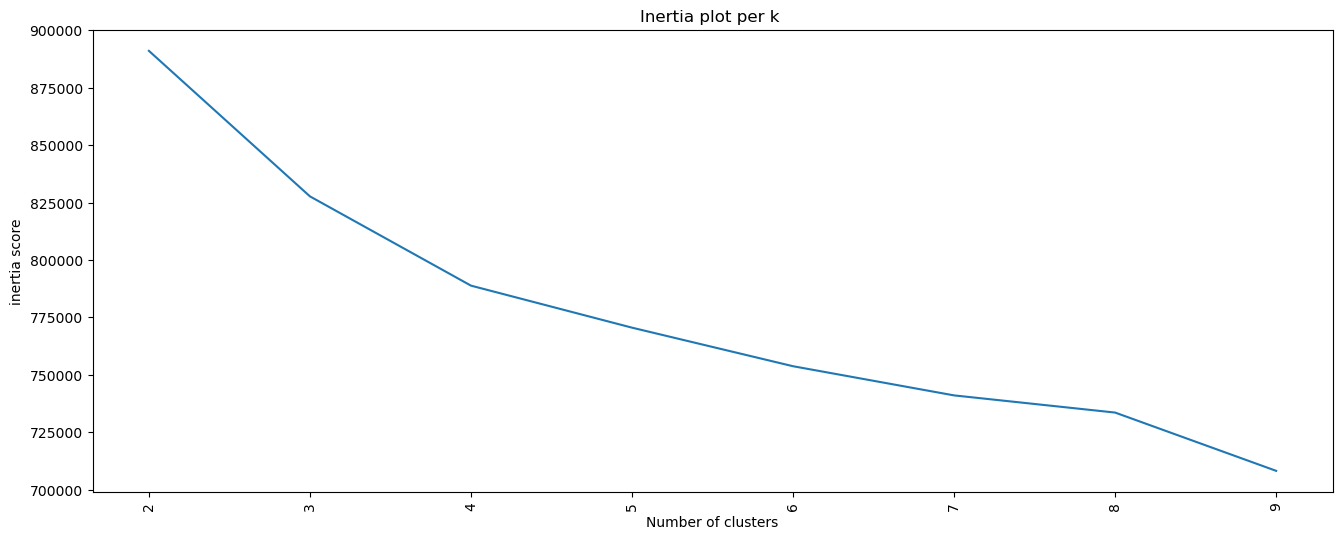

In [111]:
fig,(ax1) = plt.subplots(1, figsize = (16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('inertia score')
plt.title('Inertia plot per k ')


In [112]:
#Running kmeans on 4 clusters 

kmeans = KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(x_train)

kmeans.labels_

#prediction for new data
predictions = kmeans.predict(x_train)

#calculating the counts of the cluster
unique,counts= np.unique(predictions,return_counts=True)
counts = counts.reshape(1,4)

#creating a adataframe
countscldf = pd.DataFrame(counts,columns = ["cluster 1","cluster 2","cluster 3","cluster 4"])

#Display
countscldf

,cluster 1,cluster 2,cluster 3,cluster 4
0,26268,38060,21108,27213


In [113]:
kmeans.labels_

array([2, 2, 2, ..., 3, 0, 3])

In [114]:
predictions

array([2, 2, 2, ..., 3, 0, 3])

# PCA for dimentionality reduction 

Explained variance ration (first two componenet): [0.08579787 0.08349461]


<Figure size 640x480 with 0 Axes>

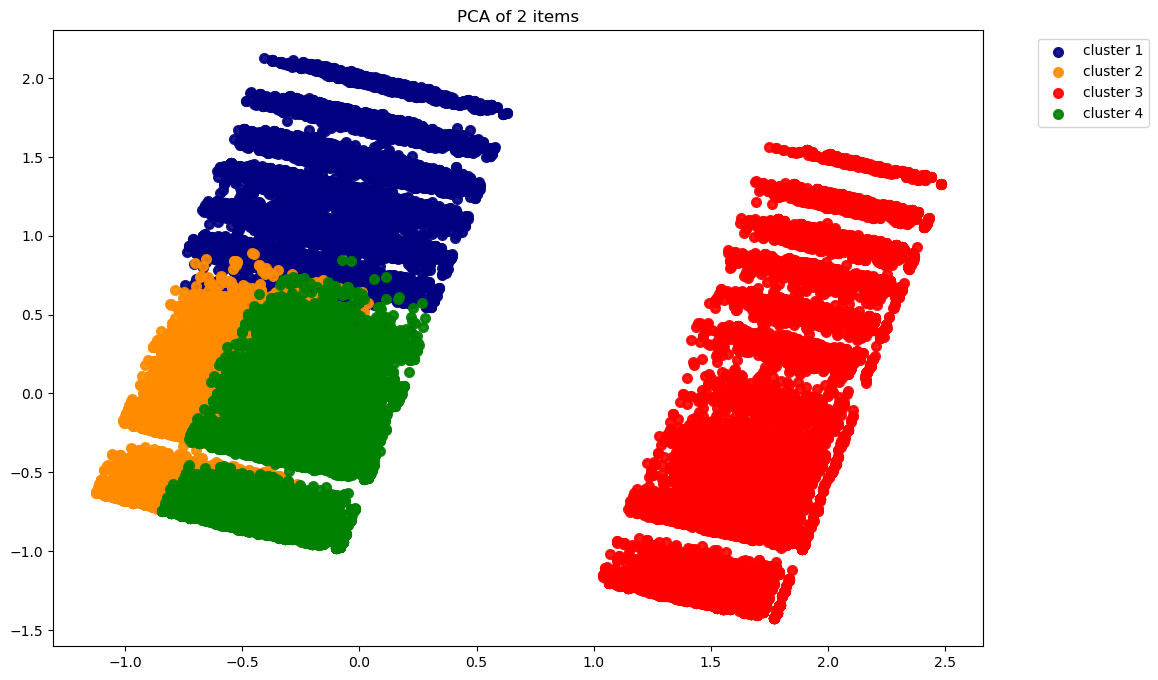

In [115]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = x_train
y_num = predictions

target_names = ["cluster 1","cluster 2","cluster 3","cluster 4"]

pca =PCA(n_components = 2 ,random_state = 453)
x_r = pca.fit(x).transform(x)

#percentage of veriance explained for each comonenets
print("Explained variance ration (first two componenet): %s" % str (pca.explained_variance_ratio_))

#plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors=['navy','darkorange','Red','Green']
lw=2

for color,i,target_name in zip (colors,[0,1,2,3],target_names):
    plt.scatter(x_r[y_num == i ,0],x_r[y_num == i,1],color=color,alpha=0.9,lw=lw,label=target_name)
    
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of 2 items')
plt.show()

# identifying the best number of components
### trying with dimentionality reduction and then kmeans

total variance in our dataset is: 8.63494813074212
The 95% variance we want to have is : 8.203200724205015

variance explain with 20n components:  7.262018628816725
variance explain with 22n components:  7.57443756887143
variance explain with 25n components:  7.960493970554878
variance explain with 28n components:  8.228011955577665
variance explain with 30n components:  8.368857861022226
variance explain with 33n components:  8.508301253794425
variance explain with 35n components:  8.555964705109558


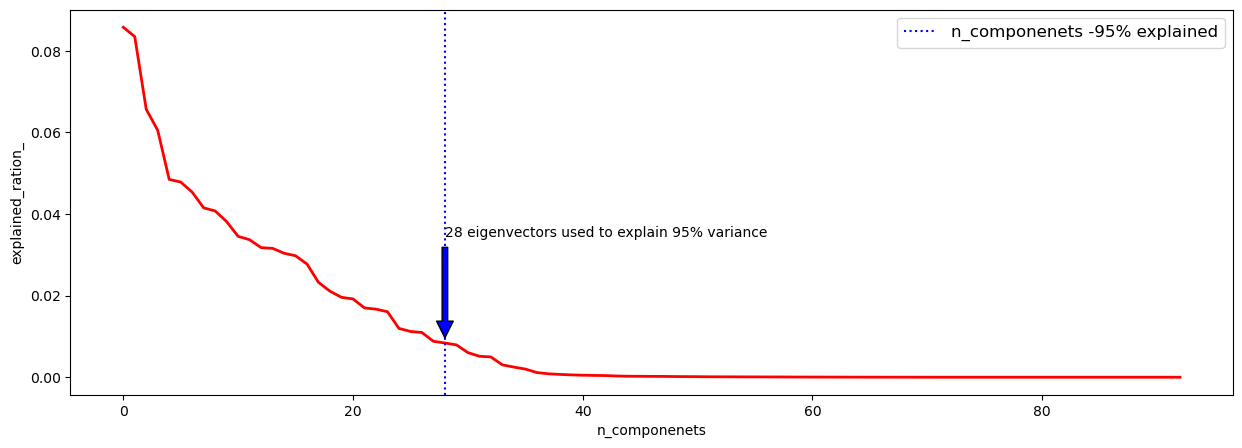

In [116]:
n_components = x.shape[1]

#running PCA with all componenets
pca=PCA(n_components=n_components,random_state=453)
x_r= pca.fit(x).transform(x)

#calculating 95%variance
total_variance = sum(pca.explained_variance_)
print('total variance in our dataset is:',total_variance)
var_95 = total_variance * 0.95
print('The 95% variance we want to have is :',var_95)
print("")

#creating a df with the components and explained variance
a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns= ["PCA Comp","Explained Variance"] )

##tring to hit 95%
print('variance explain with 20n components: ',sum(a['Explained Variance'][0:20]))
print('variance explain with 22n components: ',sum(a['Explained Variance'][0:22]))
print('variance explain with 25n components: ',sum(a['Explained Variance'][0:25]))
print('variance explain with 28n components: ',sum(a['Explained Variance'][0:28]))
print('variance explain with 30n components: ',sum(a['Explained Variance'][0:30]))
print('variance explain with 33n components: ',sum(a['Explained Variance'][0:33]))
print('variance explain with 35n components: ',sum(a['Explained Variance'][0:35]))


### plotting the data
plt.figure(1,figsize=(15,5))
plt.plot(pca.explained_variance_ratio_,linewidth =2 ,c="r")
plt.xlabel('n_componenets')
plt.ylabel('explained_ration_')

##plotting line with 95% e.v.
plt.axvline(28,linestyle=":",label="n_componenets -95% explained",c="blue")
plt.legend(prop=dict(size=12))

#adding arrow
plt.annotate('28 eigenvectors used to explain 95% variance',xy=(28,pca.explained_variance_ratio_[28]),
             xytext=(28,pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue',shrink=0.05))

plt.show()

#### Running Kmeans with 4 Clusters and PCA with 28 componenets 

In [117]:
#running PCA with 28 componenets
pca=PCA(n_components=28,random_state=453)
x_r= pca.fit(x).transform(x)


#Running kmeans

Kmeans = KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(x_r)
    
clusters = kmeans.labels_

#Attaching the clusters to our original dataset
df['clusters'] = clusters



In [118]:
df.tail()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,UnitPrice_brackets,Amount,Amount_brackets,Invoice_weekname,Invoice_Year,Invoice_Month,Invoice_QTR,Invoice_Day,Invoice_Date,clusters
206706,554955,17412.0,Aberdeenshire,51.525317,-3.717918,YoungeAdult,Male,Single,More than half a day,"Less Than 50,000",...,upto Two Thousand,16.5,Ten to Twenty Thousand,Friday,2011,5,2,1,2011-05-27,0
206707,554955,17412.0,Bradford,54.526051,0.359304,SenierCitizen,Male,Couple,Up to 3 hours,"Less Than 100,000",...,upto Five Thousand,20.8,Twenty to Thirty Thousand,Friday,2011,5,2,1,2011-05-27,1
206708,554955,17412.0,Aberdeenshire,51.351018,-0.086298,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,upto Twelve Thousand,27.0,Twenty to Thirty Thousand,Friday,2011,5,2,1,2011-05-27,1
206709,554955,17412.0,Wiltshire,51.527785,0.566457,MiddleAgeAdult,Male,Single,Half a day,"Less Than 100,000",...,upto Two Thousand,23.4,Twenty to Thirty Thousand,Friday,2011,5,2,1,2011-05-27,0
206710,554955,17412.0,South Cambridgeshire,56.055950,-2.916891,MiddleAgeAdult,Male,Single,Up to 3 hours,"More Than 200,000",...,upto Two Thousand,16.5,Ten to Twenty Thousand,Friday,2011,5,2,1,2011-05-27,1


In [119]:
df.shape

(112649, 26)

In [120]:
df.clusters.value_counts(ascending =True)

3    21108
0    26134
1    27311
2    38096
Name: clusters, dtype: int64

In [121]:
#Creating a cluster category:

df['Clusters_Category'] = 'No Data'


#df.clusters.value_counts(ascending =True)

In [122]:
df.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,Amount,Amount_brackets,Invoice_weekname,Invoice_Year,Invoice_Month,Invoice_QTR,Invoice_Day,Invoice_Date,clusters,Clusters_Category
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",...,15.30,Ten to Twenty Thousand,Wednesday,2010,12,4,3,2010-12-01,3,No Data
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01,3,No Data
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,22.00,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01,3,No Data
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",...,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01,3,No Data
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,20.34,Twenty to Thirty Thousand,Wednesday,2010,12,4,3,2010-12-01,3,No Data


In [123]:
df['Clusters_Category'].loc[df['clusters'] == 0] ='clusters 1'
df['Clusters_Category'].loc[df['clusters'] == 1] ='clusters 2'
df['Clusters_Category'].loc[df['clusters'] == 2] ='clusters 3'
df['Clusters_Category'].loc[df['clusters'] == 3] ='clusters 4'
#df['Clusters_Category'].loc[df['clusters'] == 4] ='clusters 5'

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1816352641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters_Category'].loc[df['clusters'] == 0] ='clusters 1'
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1816352641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters_Category'].loc[df['clusters'] == 1] ='clusters 2'
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1816352641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [124]:
df.tail(2)

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,Amount,Amount_brackets,Invoice_weekname,Invoice_Year,Invoice_Month,Invoice_QTR,Invoice_Day,Invoice_Date,clusters,Clusters_Category
206709,554955,17412.0,Wiltshire,51.527785,0.566457,MiddleAgeAdult,Male,Single,Half a day,"Less Than 100,000",...,23.4,Twenty to Thirty Thousand,Friday,2011,5,2,1,2011-05-27,0,clusters 1
206710,554955,17412.0,South Cambridgeshire,56.055950,-2.916891,MiddleAgeAdult,Male,Single,Up to 3 hours,"More Than 200,000",...,16.5,Ten to Twenty Thousand,Friday,2011,5,2,1,2011-05-27,1,clusters 2


In [125]:
df.shape

(112649, 27)

In [126]:
for column in df:
    unique = df[column].unique()
    value = len (unique)
    if value < 10:
        print('{} :{} -- {}'.format (column,value,unique))
    else:
        print('{} :{} '.format (column,value))

InvoiceNo :7104 
CustomerID :2663 
District :225 
latitude :13242 
longitude :13260 
Age :5 -- ['MiddleAgeAdult' 'SenierCitizen' 'OldAdult' 'YoungeAdult' 'Child']
Gender :2 -- ['Female' 'Male']
Current_Status :4 -- ['Married with children' 'Couple' 'Single' 'Living With Parent']
Social_Media :3 -- ['Up to 3 hours' 'Half a day' 'More than half a day']
Total_Household_Income :5 -- ['Less Than 100,000' 'Less Than 50,000' 'Less Than 200,000'
 'More Than 200,000' 'Less than 20,000']
StockCode :2423 
Description :2480 
Quantity :129 
UnitPrice :156 
Country :35 
Quantity_brackets :5 -- ['Six to Twelve', 'One or Two', 'Thirteen to Fifty', 'Three to Five', 'Bulk Order']
Categories (5, object): ['One or Two' < 'Three to Five' < 'Six to Twelve' < 'Thirteen to Fifty' < 'Bulk Order']
UnitPrice_brackets :4 -- ['upto Five Thousand', 'upto Twelve Thousand', 'upto Two Thousand', 'Thirteen Thousand plus']
Categories (4, object): ['upto Two Thousand' < 'upto Five Thousand' < 'upto Twelve Thousand' < 'Th

In [127]:
#Creating an order for Age 
df['Age Order']=0
df['Age Order'].loc[df['Age'] == 'child'] = 1
df['Age Order'].loc[df['Age'] == 'YoungeAdult'] = 2
df['Age Order'].loc[df['Age'] == 'MiddleAgeAdult'] = 3
df['Age Order'].loc[df['Age'] == 'OldAdult'] = 4
df['Age Order'].loc[df['Age'] == 'SenierCitizen'] = 5

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\224984904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Order'].loc[df['Age'] == 'child'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\224984904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Order'].loc[df['Age'] == 'YoungeAdult'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\224984904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [128]:
#Creating an order for Current_Status 
df['Current_Status Order']=0
df['Current_Status Order'].loc[df['Current_Status'] == 'Single'] = 1
df['Current_Status Order'].loc[df['Current_Status'] == 'Living With Parent'] = 2
df['Current_Status Order'].loc[df['Current_Status'] == 'Couple'] = 3
df['Current_Status Order'].loc[df['Current_Status'] == 'Married with children'] = 4

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1718761907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current_Status Order'].loc[df['Current_Status'] == 'Single'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1718761907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current_Status Order'].loc[df['Current_Status'] == 'Living With Parent'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1718761907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [129]:
#Creating an order for Social_Media 
df['Social_Media Order']=0
df['Social_Media Order'].loc[df['Social_Media'] == 'Up to 3 hours'] = 1
df['Social_Media Order'].loc[df['Social_Media'] == 'Half a day'] = 2
df['Social_Media Order'].loc[df['Social_Media'] == 'More than half a day'] = 3

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2111554328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_Media Order'].loc[df['Social_Media'] == 'Up to 3 hours'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2111554328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_Media Order'].loc[df['Social_Media'] == 'Half a day'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2111554328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [130]:
#Total_Household_Income :5 -- ['Less Than 100,000' 'Less Than 50,000' 'Less Than 200,000'
# 'More Than 200,000' 'Less than 20,000']

In [131]:
#Creating an order for Total_Household_Income 
df['Total_Household_Income Order']=0
df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less than 20,000'] = 1
df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less Than 50,000'] = 2
df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less Than 100,000'] = 3
df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less Than 200,000'] = 4
df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'More Than 200,000'] = 5

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2603603307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less than 20,000'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2603603307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Household_Income Order'].loc[df['Total_Household_Income'] == 'Less Than 50,000'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2603603307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [132]:
 #Creating an order for Quantity_brackets
df['Quantity_brackets Order']=0
df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'One or Two'] = 1
df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'Three to Five'] = 2
df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'Six to Twelve'] = 3
df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'Thirteen to Fifty'] = 4
df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'Bulk Order'] = 5

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1173735207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'One or Two'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1173735207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity_brackets Order'].loc[df['Quantity_brackets'] == 'Three to Five'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\1173735207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [133]:
 #Creating an order for UnitPrice_brackets
df['UnitPrice_brackets Order']=0
df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'upto Two Thousand'] = 1
df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'upto Five Thousand'] = 2
df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'upto Twelve Thousand'] = 3
df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'Thirteen Thousand plus'] = 4


C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2807013769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'upto Two Thousand'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2807013769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice_brackets Order'].loc[df['UnitPrice_brackets'] == 'upto Five Thousand'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2807013769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [134]:
 #Creating an order for Amount_brackets
df['Amount_brackets Order']=0
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'upto Five Thousand'] = 1
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Five to Ten Thousand'] = 2
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Ten to Twenty Thousand'] = 3
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Twenty to Thirty Thousand'] = 4
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Thirty to Fifty Thousand'] = 5
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Fifty to One Lakh'] = 6
df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'One Lakh Plus'] = 7

C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2645629038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'upto Five Thousand'] = 1
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2645629038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_brackets Order'].loc[df['Amount_brackets'] == 'Five to Ten Thousand'] = 2
C:\Users\Tapasya-vp marketing\AppData\Local\Temp\ipykernel_17044\2645629038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [135]:
df.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,Invoice_Date,clusters,Clusters_Category,Age Order,Current_Status Order,Social_Media Order,Total_Household_Income Order,Quantity_brackets Order,UnitPrice_brackets Order,Amount_brackets Order
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",...,2010-12-01,3,clusters 4,3,4,1,3,3,2,3
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,2010-12-01,3,clusters 4,5,4,1,2,3,2,4
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,2010-12-01,3,clusters 4,4,4,1,3,3,2,4
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",...,2010-12-01,3,clusters 4,4,3,2,2,3,2,4
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,2010-12-01,3,clusters 4,5,4,1,4,3,2,4


In [136]:
# Exporting Data in CSV format

df.to_csv('Raw Data Export PowerBI',sep='\t')

In [137]:
df.to_excel('Raw Data Export PowerBI.xlsx')

In [138]:
new_data=pd.merge(df,RFM,on="CustomerID")


In [139]:
new_data.head()

,InvoiceNo,CustomerID,District,latitude,longitude,Age,Gender,Current_Status,Social_Media,Total_Household_Income,...,UnitPrice_brackets Order,Amount_brackets Order,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,score,customer_type
0,536365,17850.0,Welwyn Hatfield,51.727429,-0.183648,MiddleAgeAdult,Female,Married with children,Up to 3 hours,"Less Than 100,000",...,2,3,177,34,4783.46,1,4,1,6.0,Silver
1,536365,17850.0,Welwyn Hatfield,51.804482,-0.195898,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 50,000",...,2,4,177,34,4783.46,1,4,1,6.0,Silver
2,536365,17850.0,Aberdeenshire,57.692200,-0.195898,OldAdult,Male,Married with children,Up to 3 hours,"Less Than 100,000",...,2,4,177,34,4783.46,1,4,1,6.0,Silver
3,536365,17850.0,Birmingham,52.526595,-1.822211,OldAdult,Male,Couple,Half a day,"Less Than 50,000",...,2,4,177,34,4783.46,1,4,1,6.0,Silver
4,536365,17850.0,Waltham Forest,51.593979,-0.040803,SenierCitizen,Male,Married with children,Up to 3 hours,"Less Than 200,000",...,2,4,177,34,4783.46,1,4,1,6.0,Silver


In [140]:
new_data.shape

(112649, 42)

In [141]:
new_data.CustomerID.nunique()

2663

In [142]:
new_data.to_excel('RFMDATA Export PowerBI.xlsx')